# Simple networks

### Useful Links:

* pytorch official documentation
http://pytorch.org/docs/master/index.html

* pytorch discussion
https://discuss.pytorch.org/

* pytorch official tutorials
https://pytorch.org/tutorials/

## Preliminaries

In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# to make interactive plotting possible
%matplotlib inline
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [4]:
# make plots a bit nicer
plt.matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

In [5]:
# random seed settings
torch.manual_seed(42)
np.random.seed(42)

# data type (useful to have in pytorch)
dtype_np = np.float64
dtype_torch = torch.FloatTensor

In [6]:
# print versions
from platform import python_version
print(f"python version: {python_version()}")
print(f"torch version: {torch.__version__}")

python version: 3.8.12
torch version: 1.11.0


### Pathes

In [7]:
!apt install wget

Reading package lists... Done
Building dependency tree       
Reading state information... Done
wget is already the newest version (1.19.4-1ubuntu2.2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [8]:
# transfer data to colab
!wget https://raw.githubusercontent.com/lyubonko/ucu2022cv/master/assignments/data/toy_data/data_class_train.txt
!wget https://raw.githubusercontent.com/lyubonko/ucu2022cv/master/assignments/data/toy_data/data_class_test.txt

# create local folder with data
path_folder = "data"
if not os.path.exists(path_folder):
  os.mkdir(path_folder)

# data pathes
path_data_train = os.path.join(path_folder, "data_class_train.txt")
path_data_test = os.path.join(path_folder, "data_class_test.txt")

# move files 
os.replace("data_class_test.txt", path_data_test)
os.replace("data_class_train.txt", path_data_train)

--2023-01-24 18:47:49--  https://raw.githubusercontent.com/lyubonko/ucu2022cv/master/assignments/data/toy_data/data_class_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68147 (67K) [text/plain]
Saving to: ‘data_class_train.txt’

data_class_train.tx 100%[===================>]  66.55K  --.-KB/s    in 0.01s   

2023-01-24 18:47:49 (5.74 MB/s) - ‘data_class_train.txt’ saved [68147/68147]

--2023-01-24 18:47:50--  https://raw.githubusercontent.com/lyubonko/ucu2022cv/master/assignments/data/toy_data/data_class_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request 

### Data (playground)

In [9]:
# we will work with one file (but we can do it with two files)
path_data = path_data_train

In [10]:
# load data
data = np.loadtxt(path_data)
dataX = data[:,0:2]
dataY = data[:,2]

In [11]:
n_samples = data.shape[0]
dim_in = 2 # two features
dim_out = 3 # three classes

n_train = int(n_samples * 0.7)
n_test = n_samples - n_train

In [12]:
# train-test partition
perm = np.random.permutation(n_samples)
train_indx = perm[:n_train]
test_indx = perm[n_train:]

dataX_train, dataY_train = dataX[train_indx,:], dataY[train_indx]
dataX_test, dataY_test = dataX[test_indx,:], dataY[test_indx]

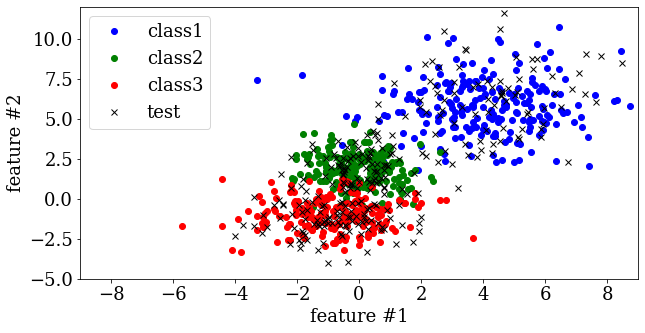

In [13]:
# visualize data
plt.figure(figsize=(10,5))
plt.plot(dataX_train[dataY_train==0,0], dataX_train[dataY_train==0,1],'ob', label="class1")
plt.plot(dataX_train[dataY_train==1,0], dataX_train[dataY_train==1,1],'og', label="class2")
plt.plot(dataX_train[dataY_train==2,0], dataX_train[dataY_train==2,1],'or', label="class3")

plt.plot(dataX_test[:,0], dataX_test[:,1],'xk', label="test")

plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend()
plt.xlim(-9, 9)
plt.ylim(-5, 12);

## Two-layer Network ('by hand')


$$x_{hidden} = RELU(x  \cdot W_1 + b_1)$$
$$y_{pred} = x_{hidden} \cdot W_2 + b_2$$

In [14]:
dim_hidden = 100 # hidden dimension

In [15]:
# input 
x = torch.from_numpy(dataX_train).type(dtype_torch)
y = torch.from_numpy(dataY_train).type(torch.LongTensor)

* Weights and biases

### <font color="red"> **[PROBLEM I]**: </font>   
 <font color="red"> Fill the missing part (weights and biases for the output layer) </font>  

In [16]:
# Randomly initialize weights
w1_value = np.random.randn(dim_in, dim_hidden)
w2_value = np.random.randn(dim_hidden, dim_out) # YOUR CODE HERE

# Randomly initialize biases
b1_value = np.random.randn(dim_hidden)
b2_value = np.random.randn(dim_out) # YOUR CODE HERE


* tell pytorch that these variables will participate in backprop. requires_grad=False by default, more details: https://pytorch.org/docs/stable/notes/autograd.html

In [17]:
w1 = torch.from_numpy(w1_value).type(dtype_torch).requires_grad_(True)
w2 = torch.from_numpy(w2_value).type(dtype_torch).requires_grad_(True)
b1 = torch.from_numpy(b1_value).type(dtype_torch).requires_grad_(True)
b2 = torch.from_numpy(b2_value).type(dtype_torch).requires_grad_(True)

* Loss (we will use cross-entropy loss), see documentation for details http://pytorch.org/docs/master/nn.html#torch.nn.CrossEntropyLoss

In [18]:
criterion = nn.CrossEntropyLoss()

* learning parameters

In [19]:
learning_rate = 1e-3
n_iteration = 1000

### <font color="red"> **[PROBLEM II]**: </font>   
 <font color="red"> Fill the missing part (last operation in forward pass to calculate *y_pred*) </font>  

In [20]:
logger = {}
logger['iteration'] = []
logger['loss_iteration'] = []

for t in range(n_iteration):  
 
    # forward pass
    x_hidden = x.mm(w1) + b1
    x_hidden_act = x_hidden.clamp(min=0) # apply RELU
    y_pred = x_hidden_act @ w2 + b2 # YOUR CODE HERE
    
    # compute loss
    loss = criterion(y_pred, y)

    # backprop
    loss.backward()

    # update weights using gradient descent  
    w1.data -= learning_rate * w1.grad
    w2.data -= learning_rate * w2.grad
    b1.data -= learning_rate * b1.grad
    b2.data -= learning_rate * b2.grad

    # manually zero the gradients
    w1.grad.zero_()
    w2.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()      
    
    # reporting & logging       
    if t % 100 == 0:
        print(t, loss.item())
        
    logger['iteration'] += [t]
    logger['loss_iteration'] += [loss.item()]

0 20.01431655883789
100 1.326693058013916
200 0.4813612103462219
300 0.38515686988830566
400 0.3476109206676483
500 0.32699519395828247
600 0.3124285340309143
700 0.3012826144695282
800 0.2926168441772461
900 0.2855115532875061


 <font color="green"> After visualizing the loss (cell below) you should see something like this </font>

![loss_toy.png](https://raw.githubusercontent.com/lyubonko/ucu2022cv/master/assignments/fig/loss_toy.png)

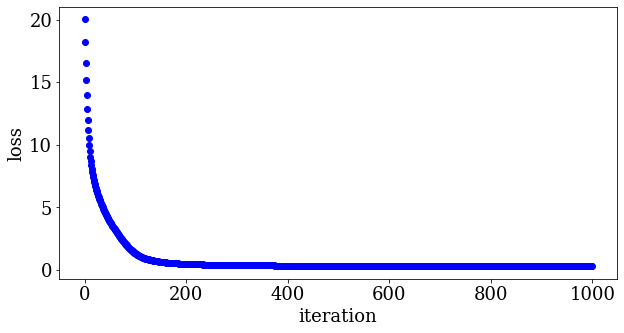

In [21]:
# visualize loss
plt.figure(figsize=(10,5))
plt.plot(logger['iteration'], logger['loss_iteration'],'ob', label="loss")

plt.xlabel('iteration')
plt.ylabel('loss');

### <font color="red"> **[PROBLEM III]**: </font>   
<font color="red"> Implement the fuction which takes x and predicts its class </font>  

In [22]:
def predict(x, w1, b1, w2, b2, dtype_torch=torch.FloatTensor):
    """
    Prediction based on two-layer model (by hand)
    
    Args:
        x (numpy.array): sample
        w1, b1, w2, b2 (torch.Tensor) : weights and biases 
    Returns:
        scalar: predicted class
    """
    t = torch.from_numpy(x).type(dtype_torch)
    with torch.inference_mode():
        forward_pass = (t@w1 + b1).clamp(min=0) @ w2 + b2 # YOUR CODE HERE

    return np.argmax(forward_pass)

<span style="color:green"> by running the following command you should get number bigger than 8 </span>

In [23]:
np.sum(np.equal([predict(x, w1, b1, w2, b2) for x in dataX_train[:10]], [0, 2, 0, 1, 0, 2, 0, 0, 1, 0]))

10

* Calculate accuracy

In [24]:
def get_accuracy(y, y_pred):
    """
    Calculate accuracy given y and y_predicted
    
    Args:
        y (numpy.array): ground truth
        y_pred (numpy.array): predictated values
         
    Returns:
        scalar: accuracy
    """
    n_samples = y.shape[0]
    return np.sum(y == y_pred)/n_samples * 100

In [25]:
y_train_predict = np.zeros(n_train)
for i in range(n_train):
    y_train_predict[i] = predict(dataX_train[i], w1, b1, w2, b2)

print("Train accuracy: %f" % get_accuracy(y_train_predict, dataY_train))

Train accuracy: 93.333333


### <font color="red"> **[PROBLEM IV]**: </font>   
<font color="red"> Calculate accuracy on the test set </font>

In [26]:
#YOUR CODE HERE
y_test_predict = np.zeros(n_test)
for i in range(n_test):
    y_test_predict[i] = predict(dataX_test[i], w1, b1, w2, b2)

print("Train accuracy: %f" % get_accuracy(y_test_predict, dataY_test))

Train accuracy: 91.851852


* Visualize decision boundary

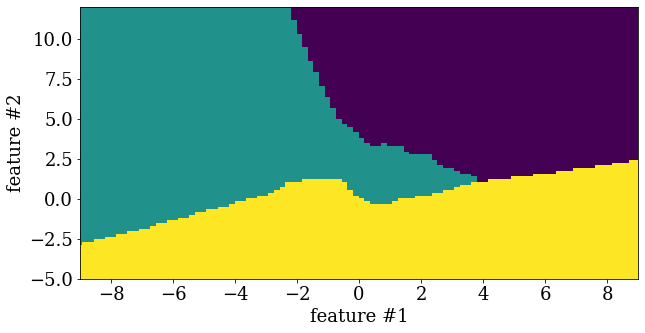

In [27]:
Nspace = 100
x1space = np.linspace(-9, 9, Nspace)
x2space = np.linspace(-5, 12, Nspace)
X,Y = np.meshgrid(x1space, x2space)

Z = np.zeros((Nspace,Nspace))
for i in range(Nspace):
    for j in range(Nspace):
        x1 = x1space[j]
        y1 = x2space[i]
        x = np.array([x1,y1])
        Z[i,j] = predict(x, w1, b1, w2, b2)

plt.figure(figsize=(10,5))
plt.pcolor(X, Y, Z, vmin=abs(Z).min(), vmax=abs(Z).max())

plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.xlim(-9, 9)
plt.ylim(-5, 12);

## Two-layer Network, again ...  (with nn package) 

$$x_{hidden} = RELU(x  \cdot W_1 + b_1)$$
$$y_{pred} = x_{hidden} \cdot W_2 + b_2$$

After some hard work we will use torch with all its power and elegance.  

* Model

In [28]:
class Net(nn.Module):
  
  def __init__(self, dim_in, dim_hidden, dim_out):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(dim_in, dim_hidden)
    self.fc2 = nn.Linear(dim_hidden, dim_out)
    
  def forward(self, x):
    x = self.fc2(F.relu(self.fc1(x)))
    return x

In [29]:
model = Net(dim_in, dim_hidden, dim_out)

* Loss (we will use cross-entropy loss)

In [30]:
criterion = nn.CrossEntropyLoss()

In [31]:
# input 
x = torch.from_numpy(dataX_train).type(dtype_torch)
y = torch.from_numpy(dataY_train).type(torch.LongTensor)

In [32]:
learning_rate = 1e-2
n_iteration = 1000

In [33]:
logger = {}
logger['iteration'] = []
logger['loss_iteration'] = []

for t in range(n_iteration):  
    
    # forward pass
    y_pred = model(x)
    
    # compute loss
    loss = criterion(y_pred, y)

    # backprop
    loss.backward()

    # update weights using gradient descent  
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data 
    
    # manually zero the gradients
    model.zero_grad()  
    
    # reporting & logging       
    if t % 100 == 0:
        print(t, loss.item())
        
    logger['iteration'] += [t]
    logger['loss_iteration'] += [loss.item()]

0 1.170824646949768
100 0.31806638836860657
200 0.2541128993034363
300 0.2233128845691681
400 0.20437166094779968
500 0.19137057662010193
600 0.1818363517522812
700 0.1745341420173645
800 0.16876676678657532
900 0.16410532593727112


In [34]:
def predict(x, model):
    """
    Prediction based on two-layer model
    
    Args:
        x (numpy.array): feature vector of a sample
         
    Returns:
        scalar: predicted class for this sample
    """    
    t = torch.from_numpy(x).type(dtype_torch)
    forward_pass = model(t)
    return np.argmax(forward_pass.data.numpy(), axis=1)

In [35]:
y_train_predict = predict(dataX_train,model)
print("Train accuracy: %f" % get_accuracy(y_train_predict, dataY_train))

y_test_predict = predict(dataX_test, model)
print("Test accuracy: %f" % get_accuracy(y_test_predict, dataY_test))

Train accuracy: 95.238095
Test accuracy: 95.925926


### <font color="red"> **[PROBLEM V]**: </font>   
<font color="red"> Visualize loss </font>

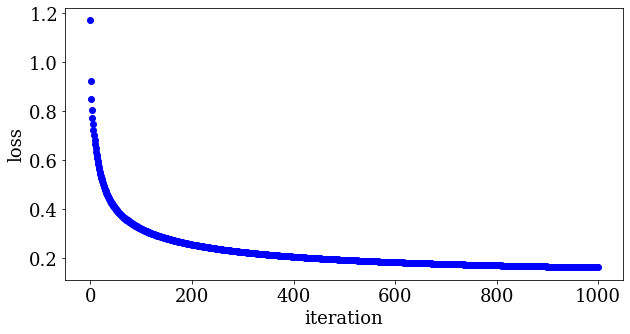

In [37]:
# YOUR CODE HERE
# visualize loss
plt.figure(figsize=(10,5))
plt.plot(logger['iteration'], logger['loss_iteration'],'ob', label="loss")

plt.xlabel('iteration')
plt.ylabel('loss');